In [1]:
import pandas as pd
import os

# directory where csv files are located
dir_path = "data/splits/data"

# initialize an empty dictionary
datasets = {}

# loop through each file in the directory
for filename in os.listdir(dir_path):
    # check if the file is a csv file
    if filename.endswith('.csv'):
        # create a pandas dataframe and store in the dictionary
        # key: filename without .csv, value: pandas dataframe
        datasets[filename[:-4]] = pd.read_csv(os.path.join(dir_path, filename))


In [3]:
datasets.keys()


dict_keys(['beetle', 'english', 'texas', 'biology', 'ASAP_sas', 'neural_course', 'concatenated_datasets', 'english_language_arts', 'science', 'neural_networks', 'concatenated_domains', 'sciEntsBank'])

In [29]:
6618 + 4969

11587

In [34]:
len(datasets["sciEntsBank"]["question_id"].unique())

331

In [26]:
import pandas as pd
import matplotlib.pyplot as plt
import os

# assuming datasets is your dictionary containing the dataframes
for key in datasets:
    df = datasets[key]

    # get class counts
    class_counts = df['assigned_points'].value_counts()

    # print class counts
    print(f"Class counts for DataFrame '{key}':\n{class_counts}")

    # plot bar graph
    class_counts.plot(kind='bar')
    plt.xlabel('Classes')
    plt.ylabel('Count')
    # plt.title(f'Class distribution in assigned_points for DataFrame {key}')

    # ensure the directory exists
    os.makedirs(f'datasets_insights/assigned_points', exist_ok=True)
    
    # save the figure
    plt.savefig(f'datasets_insights/assigned_points/{key}.png')
    
    # clear the current figure for the next plot
    plt.clf()


Class counts for DataFrame 'beetle':
0    3890
1    2728
Name: assigned_points, dtype: int64
Class counts for DataFrame 'english':
0    2048
2    1998
1    1350
Name: assigned_points, dtype: int64
Class counts for DataFrame 'texas':
5    1125
4     677
2     252
3     177
0      24
1      18
Name: assigned_points, dtype: int64
Class counts for DataFrame 'biology':
0    2944
1     435
2     137
3      76
Name: assigned_points, dtype: int64
Class counts for DataFrame 'ASAP_sas':
0    7243
1    4678
2    4624
3     662
Name: assigned_points, dtype: int64
Class counts for DataFrame 'neural_course':
2    333
1    219
0     94
Name: assigned_points, dtype: int64
Class counts for DataFrame 'concatenated_datasets':
0    17596
1    12102
2     5209
5     1125
3      839
4      677
Name: assigned_points, dtype: int64
Class counts for DataFrame 'english_language_arts':
1    1557
0    1328
2     744
Name: assigned_points, dtype: int64
Class counts for DataFrame 'science':
2    1997
1    1354
5    

<Figure size 640x480 with 0 Axes>

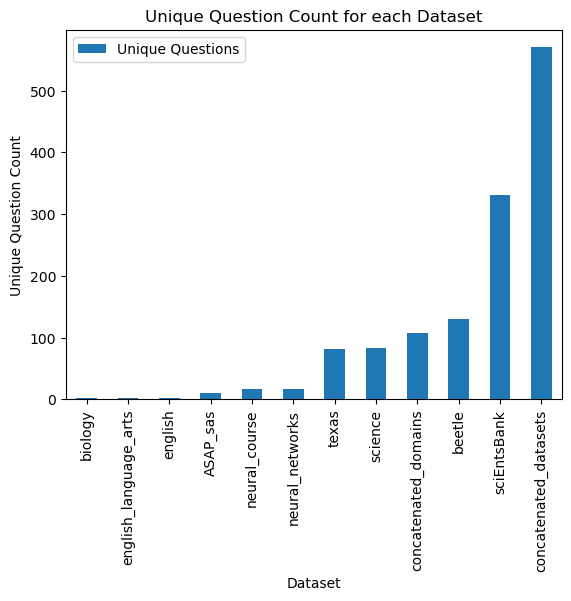

In [22]:
import pandas as pd
import matplotlib.pyplot as plt

# assuming datasets is your dictionary containing the dataframes
unique_counts = {}

for key in datasets:
    df = datasets[key]

    # count unique questions
    unique_counts[key] = df['question_id'].nunique()

# convert the dictionary to a DataFrame and sort by count
unique_counts_df = pd.DataFrame(list(unique_counts.items()), columns=['Dataset', 'Unique Questions'])
unique_counts_df = unique_counts_df.sort_values(by='Unique Questions', ascending=True)

# plot bar graph
unique_counts_df.plot(x='Dataset', y='Unique Questions', kind='bar')
plt.xlabel('Dataset')
plt.ylabel('Unique Question Count')
plt.title('Unique Question Count for each Dataset')
plt.show()


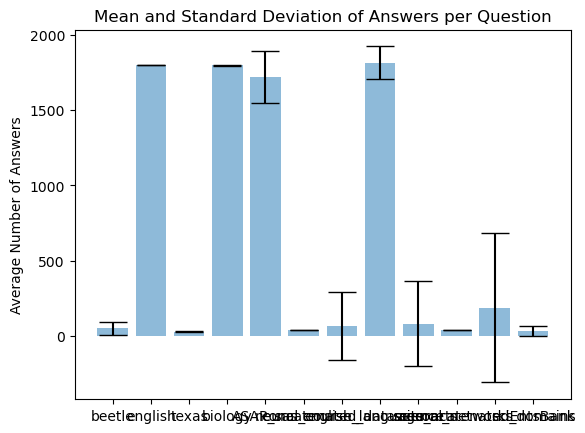

In [23]:
import pandas as pd
import matplotlib.pyplot as plt

# assuming datasets is your dictionary containing the dataframes
means = []
std_devs = []
dataset_names = []

for key in datasets:
    df = datasets[key]

    # group by question_id and count the number of rows per question_id
    question_counts = df.groupby('question_id').count()

    # calculate mean and standard deviation of question_counts
    means.append(question_counts['row_id'].mean())
    std_devs.append(question_counts['row_id'].std())
    dataset_names.append(key)

# creating the bar plot with error bars
plt.bar(dataset_names, means, yerr=std_devs, align='center', alpha=0.5, ecolor='black', capsize=10)
plt.ylabel('Average Number of Answers')
plt.title('Mean and Standard Deviation of Answers per Question')
plt.show()


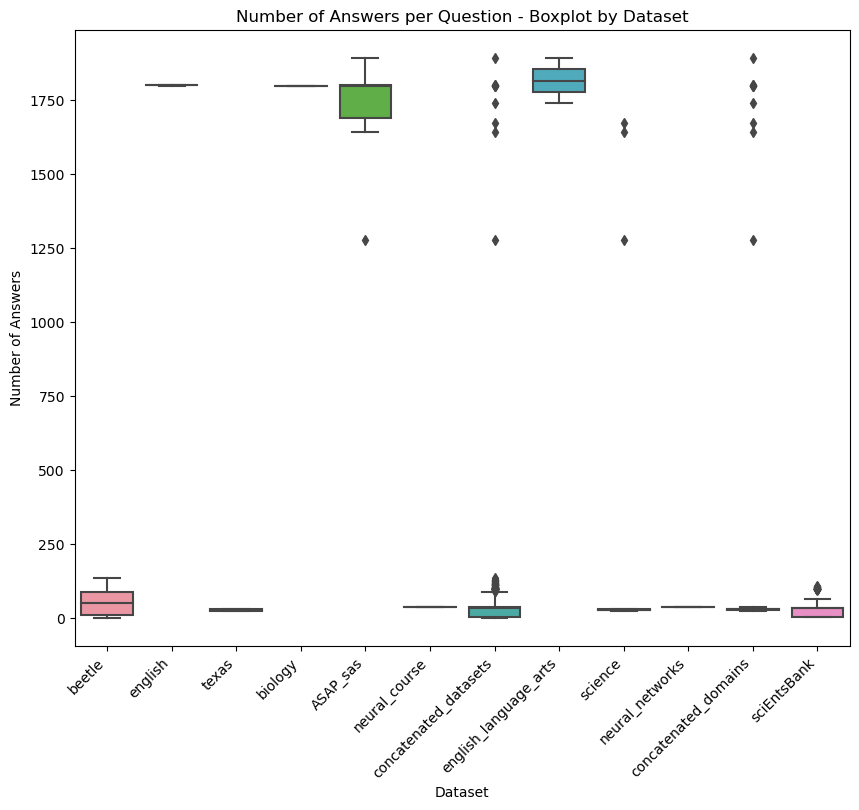

In [25]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# assuming datasets is your dictionary containing the dataframes
data_to_plot = []

for key in datasets:
    df = datasets[key]

    # group by question_id and count the number of rows per question_id
    question_counts = df.groupby('question_id').count()['row_id']

    # create a new dataframe with counts and dataset names, then append it to data_to_plot
    temp_df = pd.DataFrame({
        'Dataset': [key]*len(question_counts),
        'Number of Answers': question_counts.values
    })
    data_to_plot.append(temp_df)

# concatenate all the dataframes in data_to_plot
final_df = pd.concat(data_to_plot)

# plot a boxplot
plt.figure(figsize=(10, 8))  # increase figure size for better visibility
boxplot = sns.boxplot(x='Dataset', y='Number of Answers', data=final_df)
plt.title('Number of Answers per Question - Boxplot by Dataset')

# rotate x-axis labels if they overlap
boxplot.set_xticklabels(boxplot.get_xticklabels(), rotation=45, horizontalalignment='right')

plt.show()
